# Classify different data sets

### Basic includes

In [239]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

### Classify the Fashion Mnist

---

(60000, 28, 28)


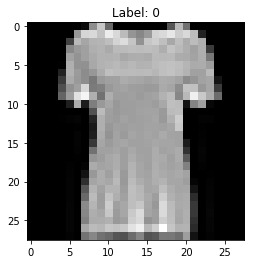

In [240]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [241]:
#normalize
#print((fashion_train_data))
#print((fashion_train_labels)) #10 categories
#t = 2
#plt.title("Label: " + str(fashion_train_labels[t]))
#plt.imshow(fashion_train_data[t], cmap="gray")

"""Normalize"""
# flatten arrays (2 dimensions to 1 dimension)
train_data = fashion_train_data.reshape((60000, 28 * 28))
test_data = fashion_test_data.reshape((10000, 28*28))
# turn values from 0-255 to 0-1
train_images = train_data.astype('float32') / 255 
test_data = test_data.astype('float32') / 255

"""One hot encoding"""
train_one_hot = to_categorical(fashion_train_labels) #number to encoding
test_one_hot = to_categorical(fashion_test_labels) #number to encoding

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [242]:
"""Create the network"""
# Building the model architecture
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_dim=784))
# Added dropout between the input and first hidden layer
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
# Added dropout between the first hidden layer and the second one
model.add(layers.Dropout(0.15))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(len(train_one_hot[0]), activation='softmax'))
model.summary()





# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='categorical_crossentropy',  # categorical because we haver more than 2 categories
              optimizer='adam', 
              metrics=['accuracy']) #metrics evaluated during the training

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_121 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_123 (Dense)            (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [243]:
history = model.fit(train_images, train_one_hot, #all the train values
          batch_size=512, #parallel processing
          epochs=40,#repetitions
          validation_split=0.3, #procentage of the train data used
          callbacks=[early_stop], #
          verbose=2) #0 = silent, 1 = progress bar, 2 = one line per epoch

Train on 42000 samples, validate on 18000 samples
Epoch 1/40
 - 2s - loss: 1.3899 - acc: 0.4985 - val_loss: 0.7028 - val_acc: 0.7593
Epoch 2/40
 - 1s - loss: 0.7751 - acc: 0.7268 - val_loss: 0.5674 - val_acc: 0.7944
Epoch 3/40
 - 1s - loss: 0.6509 - acc: 0.7684 - val_loss: 0.5109 - val_acc: 0.8242
Epoch 4/40
 - 1s - loss: 0.5896 - acc: 0.7927 - val_loss: 0.4737 - val_acc: 0.8299
Epoch 5/40
 - 1s - loss: 0.5435 - acc: 0.8090 - val_loss: 0.4466 - val_acc: 0.8392
Epoch 6/40
 - 1s - loss: 0.5119 - acc: 0.8203 - val_loss: 0.4277 - val_acc: 0.8444
Epoch 7/40
 - 1s - loss: 0.4947 - acc: 0.8261 - val_loss: 0.4184 - val_acc: 0.8493
Epoch 8/40
 - 1s - loss: 0.4761 - acc: 0.8326 - val_loss: 0.4066 - val_acc: 0.8531
Epoch 9/40
 - 1s - loss: 0.4594 - acc: 0.8386 - val_loss: 0.3928 - val_acc: 0.8581
Epoch 10/40
 - 1s - loss: 0.4503 - acc: 0.8398 - val_loss: 0.3971 - val_acc: 0.8551
Epoch 11/40
 - 1s - loss: 0.4474 - acc: 0.8423 - val_loss: 0.3910 - val_acc: 0.8572
Epoch 12/40
 - 1s - loss: 0.4294 - 

In [244]:
# Evaluating the model with the test data
results = model.evaluate(test_data, test_one_hot)
print("{}: {}\n{}: {}".format(model.metrics_names[0], results[0],model.metrics_names[1], results[1]))

10000/10000 [==============================] - 0s 28us/step
loss: 0.37332414350509646
acc: 0.8674


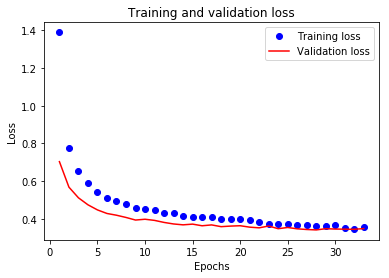

In [245]:
# This dictionary stores the validation and accuracy of the model throughout the epochs
history_dict = history.history

#Plot the history of each model: plot training and validation, loss and accuracy.
# The history values are split in different lists for ease of plotting
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

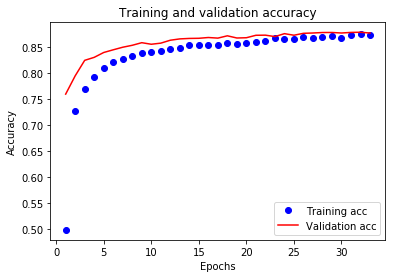

In [246]:
# Plot of the validation and train accuracy

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Process
The **first model** was created with two hidden layers, 128, 64 and 32 neurons in that order to overfit the network and reduce it.
The fitting was using:
1. batch size of 512
2. 40 epochs
3. 30% of the training data

The accuracy in the training was 0.9363, but the true value was 0.8548. 
Evaluating the model with the test set the results were:
* loss of 0.6219487633883953
* accuracy of 0.8415

The **second model** was created with three hidden layers, 64, 32 and 16 neurons in that order to reduce the overfit created with the previous model.
The fitting was using:
1. batch size of 512
2. 40 epochs
3. 30% of the training data

The accuracy in the training was 0.9363, but the true value was 0.8548. 
Evaluating the model with the test set the results were:
* loss of 0.47954736976623535
* accuracy of 0.8448

The **third model** was the same as the second model, but I changed the optimizer to adam.
Evaluating the model with the test set the results were:
* loss of 0.36955473768115044
* accuracy of 0.8722

The **fourth model** was the same as the third model in neurons, but here I added:
* two dropdowns, one of 0.3 and the next one of 0.15
* callback monitoring val_loss with patience of 5
Evaluating the model with the test set the results were:
* loss of 0.36640799753665926
* accuracy of 0.8718

Almost the same validation loss and training loss

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [247]:
(reuters_train_data, reuters_train_labels),(reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(len(reuters_train_data[0])) 

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
87
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [248]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [249]:
"""normalize the input"""

tokenizer = Tokenizer(num_words=5000)# Turning the output into vector mode, each of length 5000
reuters_train_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
reuters_test_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')
print(reuters_train_token.shape)
print(reuters_test_token.shape)

"""One-hot encoding"""
num_classes = 46 
one_hot_train_labels = to_categorical(reuters_train_labels, num_classes)
one_hot_test_labels = to_categorical(reuters_test_labels, num_classes)
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

(8982, 5000)
(2246, 5000)
(8982, 46)
(2246, 46)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [538]:
"""Create the network"""
# Building the model architecture
reuter_model = models.Sequential()


reuter_model.add(layers.Dense(1024, activation='relu', input_dim=5000))
model.add(layers.Dropout(0.5))
reuter_model.add(layers.Dense(512, activation='relu'))
# Added dropout between the input and first hidden layer
model.add(layers.Dropout(0.3))
reuter_model.add(layers.Dense(256, activation='relu'))
# Added dropout between the first hidden layer and the second one
model.add(layers.Dropout(0.1))
reuter_model.add(layers.Dense(128, activation='relu'))

reuter_model.add(layers.Dense(num_classes, activation='softmax'))
reuter_model.summary()


# included the early stopping which monitors the validation loss
early_stop_2 = callbacks.EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)
reuter_model.compile(loss='categorical_crossentropy',  # categorical because we haver more than 2 categories
              optimizer='rmsprop', 
              metrics=['accuracy']) #metrics evaluated during the training

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_380 (Dense)            (None, 1024)              5121024   
_________________________________________________________________
dense_381 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_382 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_383 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_384 (Dense)            (None, 46)                5934      
Total params: 5,815,982
Trainable params: 5,815,982
Non-trainable params: 0
_________________________________________________________________


In [539]:
"""train the network"""

history_reuters = reuter_model.fit(reuters_train_token, one_hot_train_labels, #all the train values
          batch_size=256, #parallel processing
          epochs=200,#repetitions
          validation_split=0.2, #procentage of the train data used
          callbacks = [early_stop_2],
          verbose=2) #0 = silent, 1 = progress bar, 2 = one line per epoch

Train on 7185 samples, validate on 1797 samples
Epoch 1/200
 - 6s - loss: 1.8862 - acc: 0.5777 - val_loss: 1.5132 - val_acc: 0.6183
Epoch 2/200
 - 3s - loss: 0.9808 - acc: 0.7677 - val_loss: 1.3047 - val_acc: 0.7117
Epoch 3/200
 - 3s - loss: 0.5844 - acc: 0.8568 - val_loss: 1.2531 - val_acc: 0.7156
Epoch 4/200
 - 3s - loss: 0.3886 - acc: 0.9074 - val_loss: 1.0251 - val_acc: 0.7913
Epoch 5/200
 - 3s - loss: 0.2175 - acc: 0.9488 - val_loss: 1.3260 - val_acc: 0.7479
Epoch 6/200
 - 3s - loss: 0.1861 - acc: 0.9510 - val_loss: 1.0865 - val_acc: 0.7841
Epoch 7/200
 - 3s - loss: 0.1445 - acc: 0.9571 - val_loss: 1.3565 - val_acc: 0.7813
Epoch 8/200
 - 3s - loss: 0.1281 - acc: 0.9580 - val_loss: 1.2985 - val_acc: 0.7468
Epoch 9/200
 - 3s - loss: 0.1094 - acc: 0.9570 - val_loss: 1.7118 - val_acc: 0.7501
Epoch 10/200
 - 3s - loss: 0.0993 - acc: 0.9594 - val_loss: 1.5757 - val_acc: 0.7830
Epoch 11/200
 - 3s - loss: 0.0892 - acc: 0.9598 - val_loss: 1.4977 - val_acc: 0.8002
Epoch 12/200
 - 3s - loss:

In [540]:
# Evaluating the model with the test data
reuter_results = reuter_model.evaluate(reuters_test_token, one_hot_test_labels)
print("{}: {}\n{}: {}".format(reuter_model.metrics_names[0], reuter_results[0], 
                              reuter_model.metrics_names[1], reuter_results[1]))

2246/2246 [==============================] - 1s 241us/step
loss: 1.705743442341778
acc: 0.7943009795191451


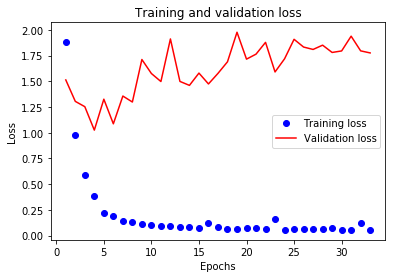

In [541]:
# This dictionary stores the validation and accuracy of the model throughout the epochs
reuter_history_dict = history_reuters.history

#Plot the history of each model: plot training and validation, loss and accuracy.
# The history values are split in different lists for ease of plotting
acc = reuter_history_dict['acc']
val_acc = reuter_history_dict['val_acc']
loss = reuter_history_dict['loss']
val_loss = reuter_history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

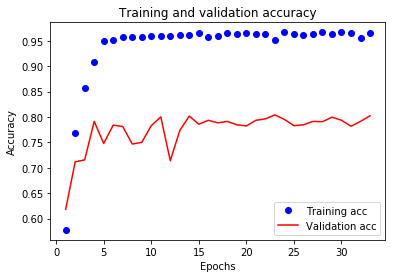

In [542]:
# Plot of the validation and train accuracy

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Process
The **first model** was created with two hidden layers, 128, 64 and 32 neurons in that order to overfit the network and reduce it.
The fitting was using:
1. batch size of 512
2. 50 epochs
3. 70% of the training data

Evaluating the model with the test set the results were:
* loss of 1.5925076249870782
* accuracy of 0.7613535174172793

The **second model** was created with three hidden layers, 64, 32 and 16 neurons in that order to reduce the overfit created with the previous model.
The fitting was using:
1. batch size of 512
2. 50 epochs
3. 70% of the training data

Evaluating the model with the test set the results were:
* loss of 3.3107286238394353
* accuracy of 0.6959038290293855

**worse model**

The **third model** was changed:
    * 512, 256 and 128 neurons are the new number of neurons in the layers
    * optimizer='rmsprop', 
    * the percentage of the trainning data used was decreased to 20%
    
    
I added:
    * two dropdowns, one of 0.5 and the next one of 0.25
    * a callback checking val_loss with patience of 5
    
Evaluating the model with the test set the results were:
* loss of 1.2423255868183112
* accuracy of 0.790293855743544

After the third model I began to modify the model by increasing the number of neuros per layer and trying different combinations 
of optimizer, loss and activation function. The best fitting model i could create was this one.
* 5 layers, 1024,512,264,128 and 46 neurons in that order.
* rmsprop as optimizer and categorical_crossentropy as the loss function.
* three dropdowns, of 0.5, 0.3 and 0.1 between the first layers
* I used only 20% of the training set

Increasing or decreasing that values didn´t increase the accuracy of the model.
The best results were:
* loss: 1.705743442341778
* accuracy: 0.7943009795191451


## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [10]:
student_data = pd.read_csv("student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

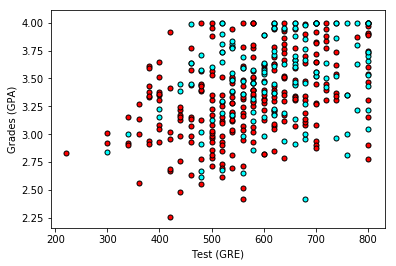

In [11]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

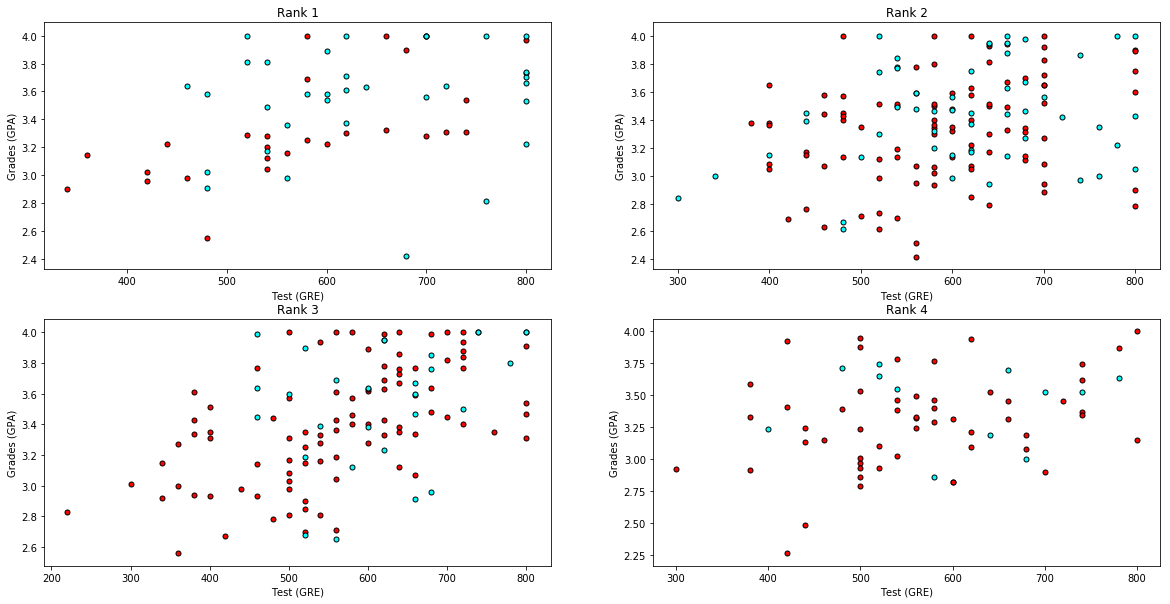

In [50]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = data[data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [392]:
"""normalize"""

labels = y

#extract each column and add data where is needed
gre = np.array(student_data[["gre"]])
for x in gre:
    if np.isnan(x[0]):
        x[0] = 0        

gpa = np.array(student_data[["gpa"]])
for x in gpa:
    if np.isnan(x[0]):
        x[0] = 0  
        
rank = np.array(student_data[["rank"]])
for x in rank:
    if np.isnan(x[0]):
        x[0] = 1

#average and standard desviation
gre_avg = np.average(gre)
gre_sd = np.std(gre)
gpa_avg = np.average(gpa)
gpa_sd = np.std(gpa)

#normalize
gre = (gre-gre_avg)/gre_sd
gpa = (gpa-gpa_avg)/gpa_sd
rank = to_categorical(rank)

#join into a single variable
data = inputs = np.zeros((len(gre),7)) #gre + gpa + 5 categories
data[:,0] = gre[0]
data[:,1] = gpa[0]
data[:,2:] = rank[:]

print(data[0])
"""One hot enconding"""
labels = to_categorical(y)

"""sets"""
index = 300
#train_data = data[:index]
test_data = data[index:]  
#train_labels = labels[:index]
test_labels = labels[index:]

[-1.67519354  0.52645679  0.          0.          0.          1.
  0.        ]


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [589]:
"""Create the network"""
# Building the model architecture
student_model = models.Sequential()

student_model.add(layers.Dense(6, activation='relu', input_dim=len(data[0])))
# Added dropout between the input and first hidden layer
model.add(layers.Dropout(0.3))
student_model.add(layers.Dense(6, activation='relu'))
# Added dropout between the first hidden layer and the second one
model.add(layers.Dropout(0.15))
student_model.add(layers.Dense(6, activation='relu'))
student_model.add(layers.Dense(len(train_labels[0]), activation='softmax'))
student_model.summary()


# included the early stopping which monitors the validation loss and search for the best result after stoping
early_stop_students = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) # 
student_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy']) #metrics evaluated during the training

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_432 (Dense)            (None, 6)                 48        
_________________________________________________________________
dense_433 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_434 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_435 (Dense)            (None, 2)                 14        
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [590]:
history_students = student_model.fit(data, labels, #all the train values
          epochs=1000,#repetitions
          validation_split=0.5, #procentage of the train data used 
          callbacks = [early_stop_students],
          verbose=2) #0 = silent, 1 = progress bar, 2 = one line per epoch

Train on 200 samples, validate on 200 samples
Epoch 1/1000
 - 5s - loss: 0.8213 - acc: 0.2800 - val_loss: 0.7619 - val_acc: 0.3550
Epoch 2/1000
 - 0s - loss: 0.7829 - acc: 0.2800 - val_loss: 0.7438 - val_acc: 0.3550
Epoch 3/1000
 - 0s - loss: 0.7611 - acc: 0.2800 - val_loss: 0.7311 - val_acc: 0.3550
Epoch 4/1000
 - 0s - loss: 0.7445 - acc: 0.2800 - val_loss: 0.7211 - val_acc: 0.3550
Epoch 5/1000
 - 0s - loss: 0.7312 - acc: 0.2800 - val_loss: 0.7113 - val_acc: 0.3550
Epoch 6/1000
 - 0s - loss: 0.7180 - acc: 0.2800 - val_loss: 0.7039 - val_acc: 0.3550
Epoch 7/1000
 - 0s - loss: 0.7079 - acc: 0.2800 - val_loss: 0.6984 - val_acc: 0.4750
Epoch 8/1000
 - 0s - loss: 0.7005 - acc: 0.4900 - val_loss: 0.6947 - val_acc: 0.5450
Epoch 9/1000
 - 0s - loss: 0.6947 - acc: 0.5250 - val_loss: 0.6903 - val_acc: 0.5450
Epoch 10/1000
 - 0s - loss: 0.6881 - acc: 0.5250 - val_loss: 0.6868 - val_acc: 0.5450
Epoch 11/1000
 - 0s - loss: 0.6825 - acc: 0.7000 - val_loss: 0.6830 - val_acc: 0.6550
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.5629 - acc: 0.7400 - val_loss: 0.6363 - val_acc: 0.6550
Epoch 97/1000
 - 0s - loss: 0.5621 - acc: 0.7400 - val_loss: 0.6363 - val_acc: 0.6550
Epoch 98/1000
 - 0s - loss: 0.5618 - acc: 0.7400 - val_loss: 0.6364 - val_acc: 0.6550
Epoch 99/1000
 - 0s - loss: 0.5611 - acc: 0.7400 - val_loss: 0.6364 - val_acc: 0.6550
Epoch 100/1000
 - 0s - loss: 0.5611 - acc: 0.7400 - val_loss: 0.6364 - val_acc: 0.6550


In [591]:
# Evaluating the model with the test data
students_results = student_model.evaluate(test_data, test_labels)
print("{}: {}\n{}: {}".format(student_model.metrics_names[0], students_results[0], 
                              student_model.metrics_names[1], students_results[1]))

100/100 [==============================] - 0s 120us/step
loss: 0.6381608784198761
acc: 0.65


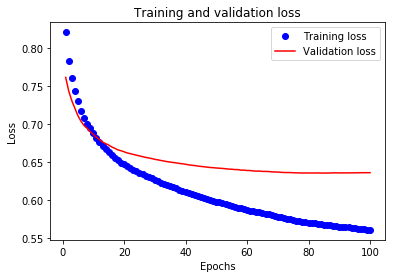

In [592]:
# This dictionary stores the validation and accuracy of the model throughout the epochs
students_history_dict = history_students.history
#Plot the history of each model: plot training and validation, loss and accuracy.
# The history values are split in different lists for ease of plotting
acc = students_history_dict['acc']
val_acc = students_history_dict['val_acc']
loss = students_history_dict['loss']
val_loss = students_history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

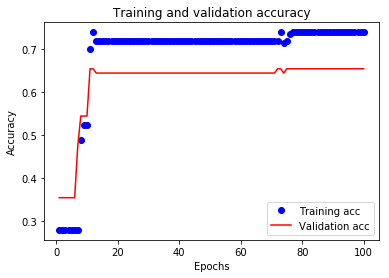

In [593]:
# Plot of the validation and train accuracy

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Process

The proccess at the beginning was the same as the one of the previous model. At the beginning decreasing the number of neurons at a minimum of 16 wasn´t enough. The model must be decreased even more, without it the model didn´t increased even more of 50%. Reaching a lower number of neurons in the model increased the accuracy up to 65%, but using different combinations of loss function, optimizer and activation function didn´t improve the accuracy. This problem may need a diferent type of neuron type or even more input data per case.